#**Name** - Abhishek Jawade
#**Email ID** - abhishek.jawade@mitaoe.ac.in
#**2nd Level Preference** - Machine Learning

#Git Hub Link = https://github.com/Abhishek-Satish-jawade/Assignment_1_Supervised_learnin_CLSFN.git

#**Problem Statement** - Implement the Naive Bayes and K-Nearest Neighbours algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization.

#The Code is written and compiled in Google Colab 
#**Python Version - 3.9**

# 1.Import all necessary files

In [157]:
#The libraries are saved as their alias names for easier function calling.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#2. Import the dataset

In [158]:
#The datasets are stored in colab's runtime if executed the code on different machine make sure that files are uploaded properly.
train_df = pd.read_csv(r'/content/train.csv')
test_df = pd.read_csv(r'/content/test.csv')

#3.1 Data PreProcessing - Shape Visualization

In [159]:
# Print the shape of the training dataset
print("The shape of training dataset is ", train_df.shape, "rows x columns")

# Print the shape of the testing dataset
print("The shape of testing dataset is ", test_df.shape, "rows x columns")


The shape of training dataset is  (891, 12) rows x columns
The shape of testing dataset is  (418, 11) rows x columns


#3.2 Data Preprocessing - Missing Values Treatment

In [160]:
full_dataset = pd.concat((train_df, test_df), sort = False) #append the testing dataset to training dataset
full_dataset.drop('PassengerId', axis =1, inplace = True) #drop the passenger ID as it is of no use.

Find the percentage of missing values in each cell and sort values in descending order.

In [161]:
#to find missing values in all columns go through all the columns and find the percentage.
column_name = full_dataset.columns
for name in column_name:
  per = ((full_dataset[name].isnull().sum())/(full_dataset[name].shape[0])) * 100
  print(name, ' = ', per)


Survived  =  31.932773109243694
Pclass  =  0.0
Name  =  0.0
Sex  =  0.0
Age  =  20.091673032849503
SibSp  =  0.0
Parch  =  0.0
Ticket  =  0.0
Fare  =  0.07639419404125286
Cabin  =  77.46371275783041
Embarked  =  0.15278838808250572


Fill the null values of age with its column mean. 

In [162]:
# Fill missing values in the 'Age' column of the 'full_dataset' DataFrame
# with the mean value of the 'Age' column
full_dataset['Age'].fillna(full_dataset['Age'].mean(), inplace=True)


In [163]:
full_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#4. Feature Enginnering.

In [164]:
# Retrieve the data types of each column in the 'full_dataset' DataFrame
full_dataset.dtypes


Survived    float64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

The block of code stores user-defined functions for Feature Engineering 
First find out number of missing values in the dataset.


In [165]:
# Count the number of missing values in each column of the 'full_dataset' DataFrame
full_dataset.isnull().sum()


Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

Now we will remove null values from embarked column by filling the null values with most occuring embarked destination.

In [166]:
# Fill missing values in the 'Embarked' column of the 'full_dataset' DataFrame
# with the most frequent value in the 'Embarked' column
full_dataset['Embarked'] = full_dataset['Embarked'].fillna(full_dataset['Embarked'].value_counts().index[0])


In [167]:
full_dataset.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

Now as we have successfully removed all tthe null values from embarked we now can move in to the cabin column.

In [168]:
full_dataset['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [169]:
full_dataset['Cabin'] = full_dataset['Cabin'].fillna(full_dataset['Cabin'].value_counts().index[0])

In [170]:
full_dataset.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin         0
Embarked      0
dtype: int64

Now for the fare part we will fill the average of the fare column in place of null values.

In [171]:
full_dataset['Fare'].fillna(full_dataset['Fare'].mean(), inplace = True)

In [172]:
full_dataset.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

#Now the code is cleaned thoroughly, we can move forward to visualization part.

#5. Visualization

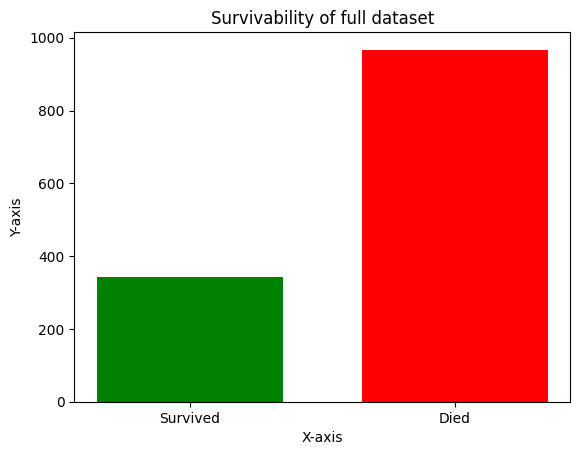

In [173]:
# Define the labels for the bars
bar_labels = ('Survived', 'Died')

# Calculate the heights of the bars
heights = (full_dataset['Survived'].sum(), 1309 - full_dataset['Survived'].sum())

# Define the coordinates for the bars
bar_coordinates = (1, 2)

# Create a bar plot using the specified parameters
plt.bar(bar_coordinates, heights, tick_label=bar_labels, width=0.7, color=['green', 'red'])

# Set the label for the x-axis
plt.xlabel('X-axis')

# Set the label for the y-axis
plt.ylabel('Y-axis')

# Set the title for the plot
plt.title("Survivability of full dataset")

# Display the plot
plt.show()


In [174]:
full_dataset['Survived'].unique()

array([ 0.,  1., nan])

81
468
233
109


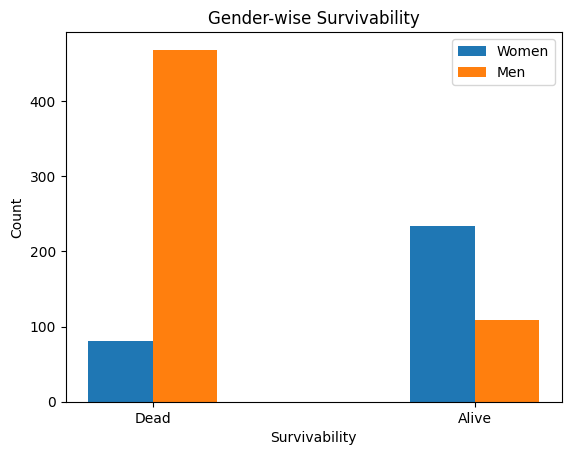

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of two elements [0, 1]
x = np.arange(2)

# Initialize variables to count the number of survivors and deaths for women and men
women_alive = 0
women_dead = 0
men_alive = 0
men_dead = 0

# Convert the 'Sex' and 'Survived' columns of the 'full_dataset' DataFrame to lists
my_list = list(full_dataset['Sex'])
my_list2 = list(full_dataset['Survived'])

# Iterate through each gender in the lists and update the respective counters
for gender in range(len(my_list)):
    if my_list[gender] == 'female' and my_list2[gender] == 0.:
        women_dead += 1
    elif my_list[gender] == 'female' and my_list2[gender] == 1.:
        women_alive += 1
    elif my_list[gender] == 'male' and my_list2[gender] == 1.:
        men_alive += 1
    elif my_list[gender] == 'male' and my_list2[gender] == 0.:
        men_dead += 1

# Print the counts for women who died, men who died, women who survived, and men who survived
print(women_dead)
print(men_dead)
print(women_alive)
print(men_alive)

# Create lists for the y-values of the bar plot
y1 = [women_dead, women_alive]
y2 = [men_dead, men_alive]

# Plot the bar chart with two sets of bars side by side
plt.bar(x-0.1, y1, 0.2)
plt.bar(x+0.1, y2, 0.2)

# Set the x-tick labels
plt.xticks(x, ['Dead', 'Alive'])

# Set the legend and labels for the plot
plt.legend(['Women', 'Men'])
plt.xlabel("Survivability")
plt.title("Gender-wise Survivability")
plt.ylabel("Count")

# Display the plot
plt.show()


136
80
87
97
119
372


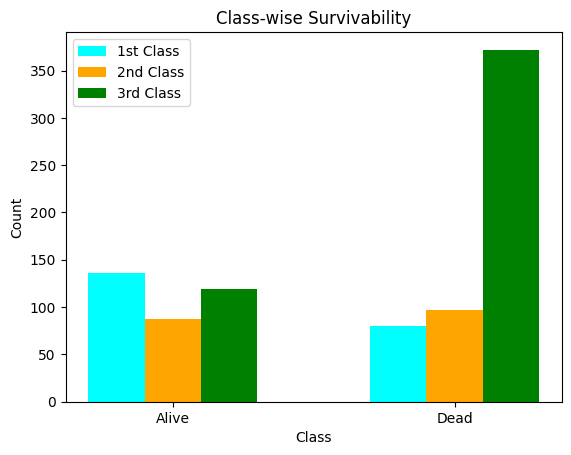

In [176]:
# Initialize variables to count the number of survivors and deaths for each passenger class
class1_alive = 0
class1_dead = 0
class2_alive = 0
class2_dead = 0
class3_alive = 0
class3_dead = 0

# Convert the 'Pclass' column of the 'full_dataset' DataFrame to a list
class_list = list(full_dataset['Pclass'])

# Iterate through each passenger class in the list and update the respective counters
for pasclass in range(len(class_list)):
    if class_list[pasclass] == 1 and my_list2[pasclass] == 1.:
        class1_alive += 1
    elif class_list[pasclass] == 1 and my_list2[pasclass] == 0.:
        class1_dead += 1
    elif class_list[pasclass] == 2 and my_list2[pasclass] == 1.:
        class2_alive += 1
    elif class_list[pasclass] == 2 and my_list2[pasclass] == 0.:
        class2_dead += 1
    elif class_list[pasclass] == 3 and my_list2[pasclass] == 1.:
        class3_alive += 1
    elif class_list[pasclass] == 3 and my_list2[pasclass] == 0.:
        class3_dead += 1

# Print the counts of survivors and deaths for each passenger class
print(class1_alive)
print(class1_dead)
print(class2_alive)
print(class2_dead)
print(class3_alive)
print(class3_dead)

# Define x-axis coordinates
x = np.arange(2)

# Define the counts for each passenger class and survival outcome
y1 = [136, 80]   # [Alive in 1st class, Dead in 1st class]
y2 = [87, 97]    # [Alive in 2nd class, Dead in 2nd class]
y3 = [119, 372]  # [Alive in 3rd class, Dead in 3rd class]

# Define the width of each bar
width = 0.2

# Plot the grouped bar chart
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')

# Set the title, x-axis and y-axis labels
plt.title("Class-wise Survivability")
plt.xticks(x, ['Alive', 'Dead'])
plt.xlabel("Class")
plt.ylabel("Count")

# Add a legend for each passenger class
plt.legend(['1st Class', '2nd Class', '3rd Class'])

# Display the plot
plt.show()


91
3
70
6
72
72
45
77
17
91
47
300


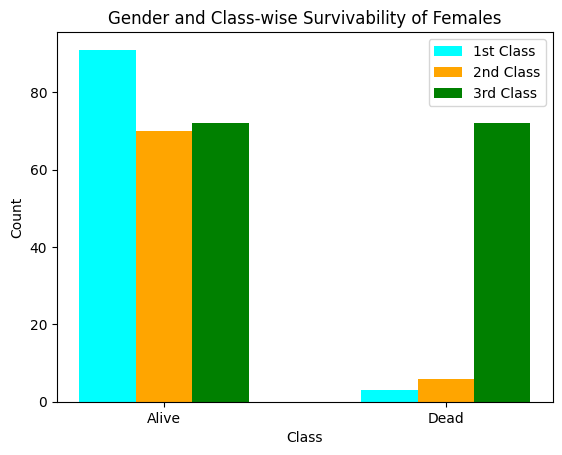

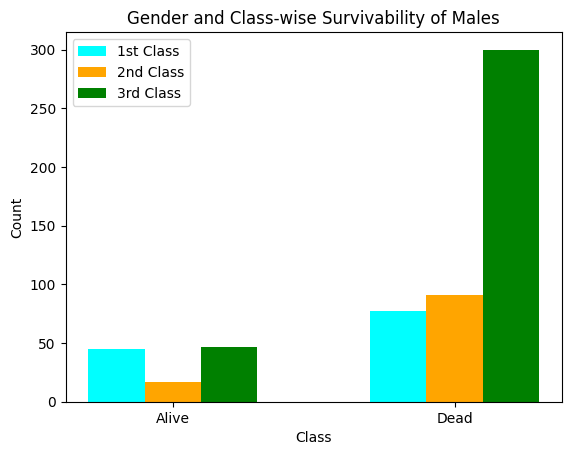

In [177]:
# Initialize variables to count the number of survivors and deaths for each gender and passenger class
female_1st_alive = 0
female_1st_dead = 0
female_2nd_alive = 0
female_2nd_dead = 0
female_3rd_alive = 0
female_3rd_dead = 0

male_1st_alive = 0
male_1st_dead = 0
male_2nd_alive = 0
male_2nd_dead = 0
male_3rd_alive = 0
male_3rd_dead = 0

# Iterate through each passenger class and gender
for sxcls in range(len(class_list)):
    # Count survivors and deaths for females in each passenger class
    if class_list[sxcls] == 1 and my_list2[sxcls] == 1. and my_list[sxcls] == 'female':
        female_1st_alive += 1
    elif class_list[sxcls] == 1 and my_list2[sxcls] == 0. and my_list[sxcls] == 'female':
        female_1st_dead += 1
    elif class_list[sxcls] == 2 and my_list2[sxcls] == 1. and my_list[sxcls] == 'female':
        female_2nd_alive += 1
    elif class_list[sxcls] == 2 and my_list2[sxcls] == 0. and my_list[sxcls] == 'female':
        female_2nd_dead += 1
    elif class_list[sxcls] == 3 and my_list2[sxcls] == 1. and my_list[sxcls] == 'female':
        female_3rd_alive += 1
    elif class_list[sxcls] == 3 and my_list2[sxcls] == 0. and my_list[sxcls] == 'female':
        female_3rd_dead += 1

    # Count survivors and deaths for males in each passenger class
    if class_list[sxcls] == 1 and my_list2[sxcls] == 1. and my_list[sxcls] == 'male':
        male_1st_alive += 1
    elif class_list[sxcls] == 1 and my_list2[sxcls] == 0. and my_list[sxcls] == 'male':
        male_1st_dead += 1
    elif class_list[sxcls] == 2 and my_list2[sxcls] == 1. and my_list[sxcls] == 'male':
        male_2nd_alive += 1
    elif class_list[sxcls] == 2 and my_list2[sxcls] == 0. and my_list[sxcls] == 'male':
        male_2nd_dead += 1
    elif class_list[sxcls] == 3 and my_list2[sxcls] == 1. and my_list[sxcls] == 'male':
        male_3rd_alive += 1
    elif class_list[sxcls] == 3 and my_list2[sxcls] == 0. and my_list[sxcls] == 'male':
        male_3rd_dead += 1

# Print the counts of survivors and deaths for each gender and passenger class
print(female_1st_alive)
print(female_1st_dead)
print(female_2nd_alive)
print(female_2nd_dead)
print(female_3rd_alive)
print(female_3rd_dead)
print(male_1st_alive)
print(male_1st_dead)
print(male_2nd_alive)
print(male_2nd_dead)
print(male_3rd_alive)
print(male_3rd_dead)

# Define the data for each gender and passenger class
female_1st_class = [female_1st_alive, female_1st_dead]
male_1st_class = [male_1st_alive, male_1st_dead]

female_2nd_class = [female_2nd_alive, female_2nd_dead]
male_2nd_class = [male_2nd_alive, male_2nd_dead]

female_3rd_class = [female_3rd_alive, female_3rd_dead]
male_3rd_class = [male_3rd_alive, male_3rd_dead]

# Plot the grouped bar chart for female survivability by class
plt.bar(x-0.2, female_1st_class, width, color='cyan')
plt.bar(x, female_2nd_class, width, color='orange')
plt.bar(x+0.2, female_3rd_class, width, color='green')
plt.xticks(x, ['Alive', 'Dead'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.title("Gender and Class-wise Survivability of Females")
plt.show()

# Plot the grouped bar chart for male survivability by class
plt.bar(x-0.2, male_1st_class, width, color='cyan')
plt.bar(x, male_2nd_class, width, color='orange')
plt.bar(x+0.2, male_3rd_class, width, color='green')
plt.xticks(x, ['Alive', 'Dead'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.title("Gender and Class-wise Survivability of Males")
plt.show()


#CODE FOR K-NEAREST NEIGHBOURS FOR GIVEN DATASET

First split the datset into two parts for training and testing.

In [178]:
full_dataset.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [179]:
full_dataset.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

#Initializing the Training and testing dataset

In [180]:
# Extract features from the full dataset for training
x_train_full = full_dataset.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Map the 'Sex' column to numerical values: male -> 0, female -> 1
x_train_full['Sex'] = x_train_full['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Convert the training features to a numpy array
x_train = x_train_full[:891].values

# Extract the target variable from the full dataset for training
y_train_full = full_dataset['Survived']

# Convert the training target variable to a numpy array
y_train = y_train_full[:891].values

# Extract features from the full dataset for testing
x_test_full = full_dataset.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Map the 'Sex' column to numerical values: male -> 0, female -> 1
x_test_full['Sex'] = x_test_full['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Convert the testing features to a numpy array
x_test = x_test_full[891:].values

# Extract the target variable from the full dataset for testing
y_test_full = full_dataset['Survived']

# Extract the testing target variable values from index 473 to 891
y_test = y_test_full[473:891]


Code for Euclidean Distance

In [181]:
import numpy as np

def euclidean_distance(x1, x2):
    """
    Calculate the Euclidean distance between two points x1 and x2.

    Parameters:
        x1 (numpy.ndarray): First point.
        x2 (numpy.ndarray): Second point.

    Returns:
        float: Euclidean distance between x1 and x2.
    """

    # Calculate the squared differences between x1 and x2
    squared_diff = (x1 - x2) ** 2
    
    # Sum up the squared differences
    sum_squared_diff = np.sum(squared_diff)
    
    # Take the square root of the sum to get the Euclidean distance
    distance = np.sqrt(sum_squared_diff)
    
    return distance


#KNN code block.

In [182]:
class KNN:
    def __init__(self, k=3):
        """
        K-Nearest Neighbors classifier.

        Parameters:
            k (int): Number of neighbors to consider. Default is 3.
        """
        self.k = k

    def fit(self, X, y):
        """
        Fit the KNN classifier to the training data.

        Parameters:
            X (numpy.ndarray): Training data features.
            y (numpy.ndarray): Training data labels.
        """
        self.x_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the labels for the given data samples.

        Parameters:
            X (numpy.ndarray): Data samples to predict labels for.

        Returns:
            numpy.ndarray: Predicted labels for the input data samples.
        """
        y_pred = []
        for sample in X:
            # Calculate the distances between the current sample and all training samples
            distances = [euclidean_distance(sample, x) for x in self.x_train]

            # Get the indices of the k nearest neighbors
            indices = np.argsort(distances)[:self.k]

            # Get the labels of the k nearest neighbors
            labels = [self.y_train[i] for i in indices]

            # Predict the label based on majority voting
            y_pred.append(max(set(labels), key=labels.count))

        return np.array(y_pred)


#Actual Values of Y

In [212]:
y_true = pd.read_csv('/content/gender_submission.csv')  # True labels from the test dataset
y_true = y_true['Survived']

#Accuracy Calculator.

In [213]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predicted labels compared to true labels.

    Parameters:
        y_true (numpy.ndarray): True labels.
        y_pred (numpy.ndarray): Predicted labels.

    Returns:
        float: Accuracy of predicted labels.
    """
    correct = np.sum(y_true == y_pred)  # Count the number of correct predictions
    total = len(y_true)  # Total number of predictions
    accuracy = correct / total  # Calculate the accuracy
    return accuracy


#KNN Function caller

In [214]:
k_values = range(1, 11)
accuracy_values = []

for k in k_values:
    knn = KNN(k=k)  # Create a KNN classifier with the current k value
    knn.fit(x_train, y_train)  # Fit the classifier to the training data
    y_pred = knn.predict(x_test)  # Predict labels for the test data
    accuracy = calculate_accuracy(y_test, y_pred)  # Calculate accuracy using the predicted labels
    accuracy_values.append(accuracy)  # Append the accuracy to the list of accuracy values


#Output of the model for k = 1 to k = 10

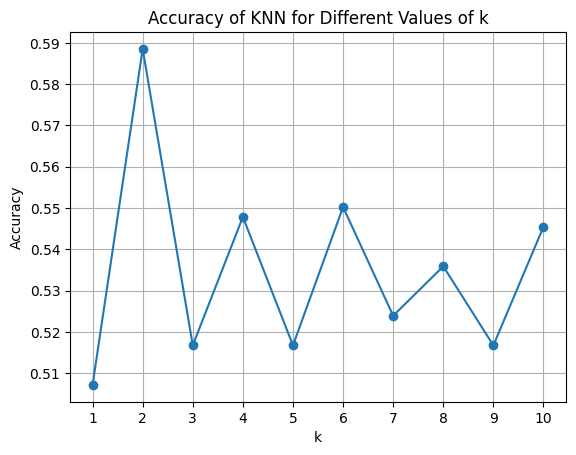

In [215]:
plt.plot(k_values, accuracy_values, marker='o')  # Plotting the accuracy values against the k values
plt.xlabel('k')  # Setting the label for the x-axis
plt.ylabel('Accuracy')  # Setting the label for the y-axis
plt.title('Accuracy of KNN for Different Values of k')  # Setting the title of the plot
plt.xticks(k_values)  # Setting the x-axis ticks to match the k values
plt.grid(True)  # Displaying grid lines on the plot
plt.show()  # Displaying the plot


File export to csv format of predicted values for kaggle competeition upload.

In [207]:
np.savetxt("Survivability.csv", 
           y_pred,
           delimiter =", ",  # Set the delimiter as a comma followed by a space
           fmt ='% i')  # Set the format of the data as string

The maximum accuracy is shown near k = 2 

<img src = 'https://drive.google.com/uc?id=1Lv_WsyJSBF7eTsqEONjBAoM6Eb9sIQKO'>

#As you can see that we have uploaded the same file which we have exported to local machine using the above given code block, the predictions show 66.028 % accuracy.

#NAIVE BAYES SCRATCH CODE FOR THE SAME DATASET.

First import the dataset in fresh manner

In [186]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#We have used similar operations in this case also so as to feed fresh dataset and minimising any chances of error.

In [187]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Then get the column names of training dataset.

In [188]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Removing redundant columns like name , ticket etc

In [189]:
# Remove unwanted columns from train dataset
train_df = train_df.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

Seperating the features.

In [190]:
# Separate the features and target variable in the train dataset
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']


Finding out the unique values

In [191]:
X_train['Sex'].unique()

array(['male', 'female'], dtype=object)

Replacing the values of gender with 0 and 1

In [192]:
X_train['Sex'] = X_train['Sex'].replace(['male', 'female'],[0 , 1]).astype(int)



,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


Initialize the training data

In [ ]:
X_train = X_train.drop('PassengerId' , axis = 1)

X_train.head()

Apply similar tactics for test dataset.

In [193]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Initialize a test dataset

In [203]:
# Extract the relevant columns from the test dataset
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].copy()

# Print the column names of X_test
print("Columns of X_test:", X_test.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [195]:
class NaiveBayes:
    def __init__(self):
        self.prior_probs = {}  # Stores the prior probabilities for each class
        self.likelihoods = {}  # Stores the likelihoods for each feature and class
    
    def calculate_prior_probs(self, y):
        # Calculate the prior probabilities for each class
        unique_classes, class_counts = np.unique(y, return_counts=True)
        total_samples = y.shape[0]
        
        for c in unique_classes:
            self.prior_probs[c] = class_counts[c] / total_samples
    
    def calculate_likelihoods(self, X, y):
        # Calculate the likelihoods for each feature and class
        features = X.columns
        
        for feature in features:
            unique_values = np.unique(X[feature])
            self.likelihoods[feature] = {}
            
            for value in unique_values:
                self.likelihoods[feature][value] = {}
                
                for c in self.prior_probs.keys():
                    feature_class_subset = X[y == c][feature]
                    value_count = feature_class_subset[feature_class_subset == value].shape[0]
                    class_count = X[y == c].shape[0]
                    self.likelihoods[feature][value][c] = value_count / class_count
    
    def predict(self, X):
        # Make predictions for the test dataset
        predictions = []
        
        for i in range(X.shape[0]):
            probs = {}
            
            for c in self.prior_probs.keys():
                prob = self.prior_probs[c]
                
                for feature in X.columns:
                    value = X[feature].iloc[i]
                    
                    if value in self.likelihoods[feature].keys():
                        prob *= self.likelihoods[feature][value][c]
                
                probs[c] = prob
            
            predicted_class = max(probs, key=probs.get)
            predictions.append(predicted_class)
        
        return predictions


In [200]:
# Initialize and train the Naive Bayes model
nb_model = NaiveBayes()
nb_model.calculate_prior_probs(y_train)
nb_model.calculate_likelihoods(X_train, y_train)

In [204]:
# Make predictions on the test dataset
predictions = nb_model.predict(X_test)

# Print the predictions
print(predictions)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 

In [208]:
np.savetxt("Naive_Bayes_Survivability.csv", 
           predictions,
           delimiter =", ",  # Set the delimiter as a comma followed by a space
           fmt ='% i')  # Set the format of the data as string

In [209]:
def calculate_accuracy(y_true, y_pred):
    # Calculate the accuracy of the predictions
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    
    return accuracy

In [216]:
accuracy = calculate_accuracy(y_true, predictions)  # Calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6076555023923444


<img src = 'https://drive.google.com/uc?id=1tjL-Z4RC72VTr8Ofvnfx9oauLVxE0d1S'>

#As you can see we have uploaded the Output of Naive Bayes to the local titanic competeition, on there it shows an accuracy of 66.028% similar to K-Nearest Neighbours.

<img src = ''>